# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The revenue of a used car dealership depends on the number of the cars sold. 

Dealer needs to sell the car at the maximum prize.

It is important to understand what are the features of the car that can increase the price of the car

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [567]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [569]:
cars = pd.read_csv('data/vehicles.csv')

In [571]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [573]:
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [575]:
unique = cars.nunique(axis = 0)
unique

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [577]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [579]:
cars.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [581]:
cars = cars.drop(columns=['id','VIN','state','paint_color'], axis=1)
cars.reset_index(inplace=True, drop = True)
cars

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan


In [583]:
cars = cars.dropna()

In [585]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82051 entries, 31 to 426836
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        82051 non-null  object 
 1   price         82051 non-null  int64  
 2   year          82051 non-null  float64
 3   manufacturer  82051 non-null  object 
 4   model         82051 non-null  object 
 5   condition     82051 non-null  object 
 6   cylinders     82051 non-null  object 
 7   fuel          82051 non-null  object 
 8   odometer      82051 non-null  float64
 9   title_status  82051 non-null  object 
 10  transmission  82051 non-null  object 
 11  drive         82051 non-null  object 
 12  size          82051 non-null  object 
 13  type          82051 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.4+ MB


In [587]:
cars = cars[cars.price != 0]
cars = cars[cars['price'].between(999, 250000)]
cars

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan
426808,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck
426809,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV
426831,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [589]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ["region", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type"]

# Apply label encoding to categorical columns
for col in categorical_columns:
    cars[col] = le.fit_transform(cars[col])

In [591]:
X = cars.drop('price', axis = 1)
y = cars['price']
X

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
31,16,2013.0,13,3818,0,5,2,128000.0,0,0,2,1,10
55,16,2004.0,13,4171,2,6,0,88000.0,0,0,0,1,8
59,16,2012.0,16,6235,0,5,2,95000.0,0,0,1,1,5
65,16,2001.0,13,4302,2,6,0,144700.0,0,1,2,1,10
73,16,2017.0,10,2201,0,6,2,90000.0,4,0,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,397,2018.0,7,2757,0,3,2,36465.0,0,0,1,2,9
426808,397,2005.0,7,7577,0,6,2,130000.0,1,0,0,1,10
426809,397,1990.0,20,4784,2,6,2,114400.0,0,0,0,1,0
426831,397,1985.0,30,457,3,5,2,115000.0,0,0,2,3,4


In [593]:
# Standardize the features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [595]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [597]:
# Linear Regression
linear_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('linear', LinearRegression())])
linear_pipe.fit(X_train, y_train)
train_predict=linear_pipe.predict(X_train)
test_predict=linear_pipe.predict(X_test)

#Regression Error
linear_train_mse = mean_squared_error(train_predict, y_train)
linear_test_mse = mean_squared_error(test_predict, y_test)
linear_train_mae = mean_absolute_error(train_predict, y_train)
linear_test_mae = mean_absolute_error(test_predict, y_test)

print(linear_pipe) 

print(f"Linear Model: train_mse={linear_train_mse}, test_mse={linear_test_mse}")
print(f"Linear Model: train_mae={linear_train_mae}, test_mae={linear_test_mae}")
print(linear_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])
Linear Model: train_mse=112737339.12247649, test_mse=112544010.73985852
Linear Model: train_mae=7244.318863375841, test_mae=7171.658944716476
0.26259740319716385


In [559]:
#Building a pipeline for the polynomial regression degree=2
poly_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=2, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

poly_pipe.fit(X_train, y_train)
train_predict=poly_pipe.predict(X_train)
test_predict=poly_pipe.predict(X_test)


#Regression Error
poly_train_mse = mean_squared_error(train_predict, y_train)
poly_test_mse = mean_squared_error(test_predict, y_test)
poly_train_mae = mean_absolute_error(train_predict, y_train)
poly_test_mae = mean_absolute_error(test_predict, y_test)

print(poly_pipe)

print(f"Polynomial Degree 2 Model: train_mse={poly_train_mse}, test_mse={poly_test_mse}")
print(f"Polynomial Degree 2 Model: train_mae={poly_train_mae}, test_mae={poly_test_mae}")
print(poly_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])
Polynomial Degree 2 Model: train_mse=58834194.24534838, test_mse=59546303.39239508
Polynomial Degree 2 Model: train_mae=4703.999683189852, test_mae=4715.013888285587
0.6098450867096149


In [599]:
#Building a pipeline for the polynomial regression degree=3

poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

poly3_pipe.fit(X_train, y_train)
train_predict=poly3_pipe.predict(X_train)
test_predict=poly3_pipe.predict(X_test)


#Regression Error
poly3_train_mse = mean_squared_error(train_predict, y_train)
poly3_test_mse = mean_squared_error(test_predict, y_test)
poly3_train_mae = mean_absolute_error(train_predict, y_train)
poly3_test_mae = mean_absolute_error(test_predict, y_test)

print(poly3_pipe)  

print(f"Polynomial Degree 3 Model: train_mse={poly3_train_mse}, test_mse={poly3_test_mse}")
print(f"Polynomial Degree 3 Model: train_mae={poly3_train_mae}, test_mae={poly3_test_mae}")
print(poly3_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linear', LinearRegression())])
Polynomial Degree 3 Model: train_mse=39603019.46096497, test_mse=96415650.50036512
Polynomial Degree 3 Model: train_mae=3723.9387429424855, test_mae=3902.219071998574
0.36827245995575486


In [561]:
#Lasso regression method degree=2

lasso_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=2, include_bias=False)),
                       ('lasso', Lasso(random_state=42))])

#Perform polynomial regression on the data

lasso_pipe.fit(X_train, y_train)
train_predict=lasso_pipe.predict(X_train)
test_predict=lasso_pipe.predict(X_test)


#Regression Error
lasso_train_mse = mean_squared_error(train_predict, y_train)
lasso_test_mse = mean_squared_error(test_predict, y_test)
lasso_train_mae = mean_absolute_error(train_predict, y_train)
lasso_test_mae = mean_absolute_error(test_predict, y_test)

print(lasso_pipe) 

print(f"Lasso Degree 2 Model: train_mse={lasso_train_mse}, test_mse={lasso_test_mse}")
print(f"Lasso Degree 2 Model: train_mae={lasso_train_mae}, test_mae={lasso_test_mae}")
print(lasso_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform', PolynomialFeatures(include_bias=False)),
                ('lasso', Lasso(random_state=42))])
Lasso Degree 2 Model: train_mse=58834385.12353549, test_mse=59537873.55289363
Lasso Degree 2 Model: train_mae=4703.787373264686, test_mae=4714.731248788275
0.6099003200845243


In [601]:
#Building a pipeline for the ridge regression
ridge_poly_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('ridge', Ridge())])


#Perform ridge regression on the data
ridge = ridge_poly_pipe.fit(X_train, y_train)
train_predict=ridge.predict(X_train)
test_predict=ridge.predict(X_test)


#Regression Error
ridge_train_mse = mean_squared_error(train_predict, y_train)
ridge_test_mse = mean_squared_error(test_predict, y_test)
ridge_train_mae = mean_absolute_error(train_predict, y_train)
ridge_test_mae = mean_absolute_error(test_predict, y_test)

print(ridge)


print(f"Ridge Degree 3 Model: train_mse={ridge_train_mse}, test_mse={ridge_test_mse}")
print(f"Ridge Degree 3 Model: train_mae={ridge_train_mae}, test_mae={ridge_test_mae}")
print(ridge.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge', Ridge())])
Ridge Degree 3 Model: train_mse=39603020.067882806, test_mse=96383870.59836441
Ridge Degree 3 Model: train_mae=3723.86776439723, test_mae=3902.119236234854
0.36848068589427807


In [563]:
#Create the alpha parameter dictionary
param_dict = {'ridge__alpha':[0.1, 1.0, 10.0, 100.0]}

#GridSearch
opt_ridge = GridSearchCV(ridge_poly_pipe, param_grid=param_dict)
opt_ridge.fit(X_train, y_train)

#Use the Ridge to predict
train_predict=opt_ridge.predict(X_train)
test_predict=opt_ridge.predict(X_test)


#Regression Error
opt_ridge_train_mse = mean_squared_error(train_predict, y_train)
opt_ridge_test_mse = mean_squared_error(test_predict, y_test)
opt_ridge_train_mae = mean_absolute_error(train_predict, y_train)
opt_ridge_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(f"Opt_Ridge Degree 3 Model: train_mse={opt_ridge_train_mse}, test_mse={opt_ridge_test_mse}")
print(f"Opt_Ridge Degree 3 Model: train_mae={opt_ridge_train_mae}, test_mae={opt_ridge_test_mae}")
print(opt_ridge.score(X_test, y_test))

Opt_Ridge Degree 3 Model: train_mse=39603018.92838474, test_mse=96411945.47049987
Opt_Ridge Degree 3 Model: train_mae=3723.9105794061525, test_mae=3902.1932598838816
0.36829673578017164


In [603]:
best_alpha = opt_ridge.best_params_
best_alpha

{'ridge__alpha': 0.1}

In [605]:
optimal_ridge_pipeline =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('ridge', Ridge(alpha = best_alpha['ridge__alpha']))])

ridge_final = optimal_ridge_pipeline.fit(X_train, y_train)
train_predict=ridge_final.predict(X_train)
test_predict=ridge_final.predict(X_test)


#Regression Error
ridge_final_train_mse = mean_squared_error(train_predict, y_train)
ridge_final_test_mse = mean_squared_error(test_predict, y_test)
ridge_final_train_mae = mean_absolute_error(train_predict, y_train)
ridge_final_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(f"Opt_Ridge Degree 3 Model: train_mse={ridge_final_train_mse}, test_mse={ridge_final_test_mse}")
print(f"Opt_Ridge Degree 3 Model: train_mae={ridge_final_train_mae}, test_mae={ridge_final_test_mae}")
print(ridge_final.score(X_test, y_test))

Opt_Ridge Degree 3 Model: train_mse=39603018.92838474, test_mse=96411945.47049987
Opt_Ridge Degree 3 Model: train_mae=3723.9105794061525, test_mae=3902.1932598838816
0.36829673578017164


In [607]:
best_linear_model = poly3_pipe.fit(X_train, y_train)
y_pred = best_linear_model.predict(X_test)
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()

,Actual,Predicted
134341,3500,2780.874023
229849,3990,5639.559326
103848,6990,10927.244141
271096,79995,61787.397705
136920,5700,10696.407715


In [609]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(best_linear_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
feature_names = X.columns.tolist()
feature_importance = np.mean(perm_importance.importances, axis=1)
feature_importance = 100.0 * (feature_importance / np.max(feature_importance))
indices = np.argsort(feature_importance)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [644]:
feature_names = best_linear_model[:-1].get_feature_names_out()

coefs_Poly3 = pd.DataFrame(
    Poly3[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs_Poly3.sort_values(by=['Coefficients'], ascending=False)

,Coefficients
transmission,6.128082e+12
transmission^3,3.623947e+11
drive^3,3.241393e+11
year,8.547225e+03
year^2,4.526437e+03
...,...
odometer,-2.817710e+03
year odometer,-4.005229e+03
drive^2,-2.459500e+11
drive,-4.794285e+11


In [646]:
coefs_Poly3.sort_values(by='Coefficients', ascending = False).head(10)

,Coefficients
transmission,6.128082e+12
transmission^3,3.623947e+11
drive^3,3.241393e+11
year,8.547225e+03
year^2,4.526437e+03
condition^2,2.679523e+03
cylinders,2.455783e+03
year cylinders,1.979073e+03
year drive^2,1.273068e+03
odometer title_status,1.168124e+03


In [648]:
coefs_Poly3.sort_values(by='Coefficients', ascending = False).tail(10)

,Coefficients
year drive,-1.250213e+03
cylinders^2 odometer,-1.287503e+03
odometer transmission,-1.548752e+03
odometer drive^2,-2.279421e+03
cylinders odometer,-2.427498e+03
odometer,-2.817710e+03
year odometer,-4.005229e+03
drive^2,-2.459500e+11
drive,-4.794285e+11
transmission^2,-3.328430e+12


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

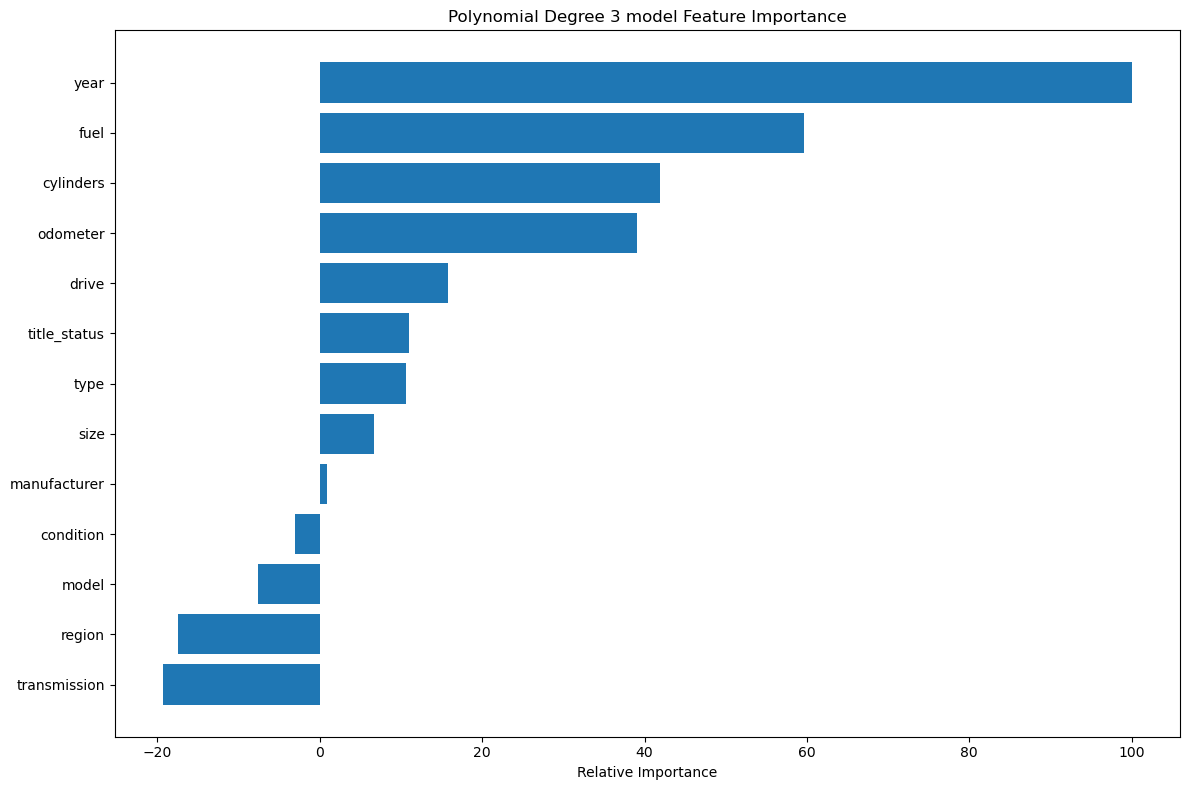

In [650]:
plt.figure(figsize=(12, 8))
plt.title('Polynomial Degree 3 model Feature Importance')
plt.barh(range(len(indices)), feature_importance[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

To yield the best price, Used car dealership should focus on
1. Year of the car
2. Fuel Efficiency
3. No.of Cylinders in the car
4. No.of miles in the Odometer
5. Drive